In [27]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [28]:
f = open("images/sino3.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [29]:
import numpy as np
metal3_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal3_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

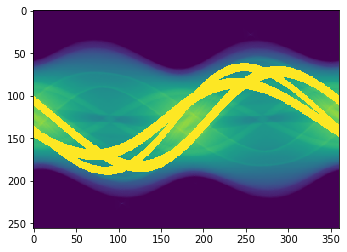

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal3_img)
plt.colorbar

In [31]:
metal3_img.shape

(256, 360)

In [32]:
result_img = metal3_img
window_size = 3

k = 0
z = 0

for i in range(256-window_size):
    for j in range(120-window_size):
        if 0 in result_img[i:i+window_size,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+window_size,j:j+window_size]:
                z = 0
            else:
                if result_img[i+window_size,j] >= 250:
                    z = 0
                else:
                    if result_img[i+window_size,j] <= 50:
                        z = 0
                    else:
                        k = k+1
train_data = np.zeros((k,window_size,window_size,1))
result_data = np.zeros((k,1))

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(3, 3, 1)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(300, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 3, 3, 32)          64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)          2112      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          4160      
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [34]:
a = [0,1,2,3,4]
a[0:3]

[0, 1, 2]

In [35]:
k = 0

for i in range(256-window_size):
    for j in range(120-window_size):
        if 0 in result_img[i:i+window_size,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+window_size,j:j+window_size]:
                z = 0
            else:
                if result_img[i+window_size,j] >= 250:
                    z = 0
                else:
                    if result_img[i+window_size,j] <= 50:
                        z = 0
                    else:
                        for v in range(window_size):
                            for w in range(window_size):
                                train_data[k,w,v,0] = result_img[i+w,j+v]
                        result_data[k,0] = int(result_img[i+window_size,j])
                        k = k+1
print(train_data.shape)
print(result_data.shape)

model.fit(train_data, result_data, epochs=1000)

(12780, 3, 3, 1)
(12780, 1)
Epoch 1/1000
400/400 [==============================] - 1s 1ms/step - loss: 5.3586 - accuracy: 0.0201
Epoch 2/1000
400/400 [==============================] - 1s 1ms/step - loss: 4.9760 - accuracy: 0.0210
Epoch 3/1000
400/400 [==============================] - 1s 1ms/step - loss: 4.9554 - accuracy: 0.0210
Epoch 4/1000
400/400 [==============================] - 1s 1ms/step - loss: 4.9408 - accuracy: 0.0209
Epoch 5/1000
400/400 [==============================] - 1s 1ms/step - loss: 4.9272 - accuracy: 0.0224
Epoch 6/1000
400/400 [==============================] - 1s 1ms/step - loss: 4.9126 - accuracy: 0.0205
Epoch 7/1000
400/400 [==============================] - 1s 1ms/step - loss: 4.8898 - accuracy: 0.0207
Epoch 8/1000
400/400 [==============================] - 1s 1ms/step - loss: 4.8431 - accuracy: 0.0223
Epoch 9/1000
400/400 [==============================] - 1s 1ms/step - loss: 4.5486 - accuracy: 0.0254
Epoch 10/1000
400/400 [==============================]

400/400 [==============================] - 1s 1ms/step - loss: 2.6735 - accuracy: 0.1386
Epoch 81/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.6465 - accuracy: 0.1427
Epoch 82/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.6638 - accuracy: 0.1386
Epoch 83/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.6423 - accuracy: 0.1473
Epoch 84/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.6951 - accuracy: 0.1322
Epoch 85/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.6342 - accuracy: 0.1430
Epoch 86/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.6871 - accuracy: 0.1395
Epoch 87/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.6120 - accuracy: 0.1483
Epoch 88/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.6608 - accuracy: 0.1395
Epoch 89/1000
400/400 [==============================] - 1s 2ms/step - loss: 2.6131 - a

400/400 [==============================] - 1s 1ms/step - loss: 2.5099 - accuracy: 0.1626
Epoch 160/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.4852 - accuracy: 0.1640
Epoch 161/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.4793 - accuracy: 0.1640
Epoch 162/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.4776 - accuracy: 0.1631
Epoch 163/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.5398 - accuracy: 0.1635
Epoch 164/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.4897 - accuracy: 0.1671
Epoch 165/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.5167 - accuracy: 0.1574
Epoch 166/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.4653 - accuracy: 0.1689
Epoch 167/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.4656 - accuracy: 0.1700
Epoch 168/1000
400/400 [==============================] - 1s 1ms/step - loss: 2

400/400 [==============================] - 1s 1ms/step - loss: 2.4538 - accuracy: 0.1731
Epoch 238/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.4192 - accuracy: 0.1732
Epoch 239/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.3756 - accuracy: 0.1836
Epoch 240/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.4251 - accuracy: 0.1708
Epoch 241/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.4180 - accuracy: 0.1802
Epoch 242/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.3956 - accuracy: 0.1803
Epoch 243/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.4454 - accuracy: 0.1761
Epoch 244/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.4455 - accuracy: 0.1709
Epoch 245/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.3896 - accuracy: 0.1854
Epoch 246/1000
400/400 [==============================] - 1s 1ms/step - loss: 2

400/400 [==============================] - 1s 1ms/step - loss: 2.3253 - accuracy: 0.1970
Epoch 316/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.3617 - accuracy: 0.1875
Epoch 317/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.3665 - accuracy: 0.1849
Epoch 318/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.3251 - accuracy: 0.1908
Epoch 319/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.3369 - accuracy: 0.1890
Epoch 320/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.3353 - accuracy: 0.1929
Epoch 321/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.3381 - accuracy: 0.1927
Epoch 322/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.3709 - accuracy: 0.1854
Epoch 323/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.3486 - accuracy: 0.1858
Epoch 324/1000
400/400 [==============================] - 1s 1ms/step - loss: 2

400/400 [==============================] - 1s 1ms/step - loss: 2.3082 - accuracy: 0.1988
Epoch 394/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.2834 - accuracy: 0.2051
Epoch 395/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.3050 - accuracy: 0.1983
Epoch 396/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.2870 - accuracy: 0.2018
Epoch 397/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.2681 - accuracy: 0.2087
Epoch 398/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.2648 - accuracy: 0.2024
Epoch 399/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.2772 - accuracy: 0.2046
Epoch 400/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.3514 - accuracy: 0.1932
Epoch 401/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.2533 - accuracy: 0.2095
Epoch 402/1000
400/400 [==============================] - 1s 1ms/step - loss: 2

400/400 [==============================] - 1s 1ms/step - loss: 2.2678 - accuracy: 0.2071
Epoch 472/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.2315 - accuracy: 0.2142
Epoch 473/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.2283 - accuracy: 0.2124
Epoch 474/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.2343 - accuracy: 0.2161
Epoch 475/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.2285 - accuracy: 0.2149
Epoch 476/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.2403 - accuracy: 0.2130
Epoch 477/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.2427 - accuracy: 0.2134
Epoch 478/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.2431 - accuracy: 0.2104
Epoch 479/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.2399 - accuracy: 0.2163
Epoch 480/1000
400/400 [==============================] - 1s 1ms/step - loss: 2

400/400 [==============================] - 1s 1ms/step - loss: 2.1918 - accuracy: 0.2228
Epoch 550/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.2133 - accuracy: 0.2160
Epoch 551/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.2110 - accuracy: 0.2196
Epoch 552/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1928 - accuracy: 0.2232
Epoch 553/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.2036 - accuracy: 0.2201
Epoch 554/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1969 - accuracy: 0.2169
Epoch 555/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1921 - accuracy: 0.2142
Epoch 556/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.2073 - accuracy: 0.2171
Epoch 557/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1987 - accuracy: 0.2233
Epoch 558/1000
400/400 [==============================] - 1s 1ms/step - loss: 2

400/400 [==============================] - 1s 1ms/step - loss: 2.1844 - accuracy: 0.2206
Epoch 628/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1855 - accuracy: 0.2211
Epoch 629/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1775 - accuracy: 0.2257
Epoch 630/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.2119 - accuracy: 0.2140
Epoch 631/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1545 - accuracy: 0.2285
Epoch 632/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1527 - accuracy: 0.2310
Epoch 633/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1659 - accuracy: 0.2300
Epoch 634/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.2250 - accuracy: 0.2160
Epoch 635/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1788 - accuracy: 0.2286
Epoch 636/1000
400/400 [==============================] - 1s 1ms/step - loss: 2

400/400 [==============================] - 1s 1ms/step - loss: 2.1650 - accuracy: 0.2187
Epoch 706/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1494 - accuracy: 0.2329
Epoch 707/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1738 - accuracy: 0.2266
Epoch 708/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1401 - accuracy: 0.2350
Epoch 709/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1440 - accuracy: 0.2282
Epoch 710/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1714 - accuracy: 0.2253
Epoch 711/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1591 - accuracy: 0.2277
Epoch 712/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1614 - accuracy: 0.2272
Epoch 713/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1351 - accuracy: 0.2304
Epoch 714/1000
400/400 [==============================] - 1s 1ms/step - loss: 2

400/400 [==============================] - 1s 1ms/step - loss: 2.1501 - accuracy: 0.2307
Epoch 784/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1454 - accuracy: 0.2344
Epoch 785/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1469 - accuracy: 0.2369
Epoch 786/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1641 - accuracy: 0.2282
Epoch 787/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1388 - accuracy: 0.2325
Epoch 788/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1203 - accuracy: 0.2397
Epoch 789/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1228 - accuracy: 0.2460
Epoch 790/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1445 - accuracy: 0.2275
Epoch 791/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1263 - accuracy: 0.2415
Epoch 792/1000
400/400 [==============================] - 1s 1ms/step - loss: 2

400/400 [==============================] - 1s 1ms/step - loss: 2.1367 - accuracy: 0.2418
Epoch 862/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1051 - accuracy: 0.2428
Epoch 863/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1841 - accuracy: 0.2286
Epoch 864/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1097 - accuracy: 0.2430
Epoch 865/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1326 - accuracy: 0.2366
Epoch 866/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1521 - accuracy: 0.2326
Epoch 867/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1302 - accuracy: 0.2427
Epoch 868/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1408 - accuracy: 0.2298
Epoch 869/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.0976 - accuracy: 0.2462
Epoch 870/1000
400/400 [==============================] - 1s 1ms/step - loss: 2

400/400 [==============================] - 1s 1ms/step - loss: 2.1127 - accuracy: 0.2408
Epoch 940/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.0961 - accuracy: 0.2455
Epoch 941/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1060 - accuracy: 0.2371
Epoch 942/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1047 - accuracy: 0.2399
Epoch 943/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1527 - accuracy: 0.2272
Epoch 944/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.0889 - accuracy: 0.2495
Epoch 945/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1114 - accuracy: 0.2419
Epoch 946/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.0977 - accuracy: 0.2481
Epoch 947/1000
400/400 [==============================] - 1s 1ms/step - loss: 2.1112 - accuracy: 0.2383
Epoch 948/1000
400/400 [==============================] - 1s 1ms/step - loss: 2

In [36]:
for i in range(256-window_size):
    for j in range(120-window_size):
        if 300 in result_img[i:i+window_size, j:j+window_size]:
            z = 0
        else:
            if result_img[i+window_size,j] == 300:
                test_data = np.zeros((1,window_size,window_size,1))
                for v in range(window_size):
                    for w in range(window_size):
                        test_data[0,w,v,0] = result_img[i+w,j+v]
                prediction = model.predict(test_data)
                result_img[i+window_size,j] = np.where(prediction[0]==max(prediction[0]))[0][0]

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

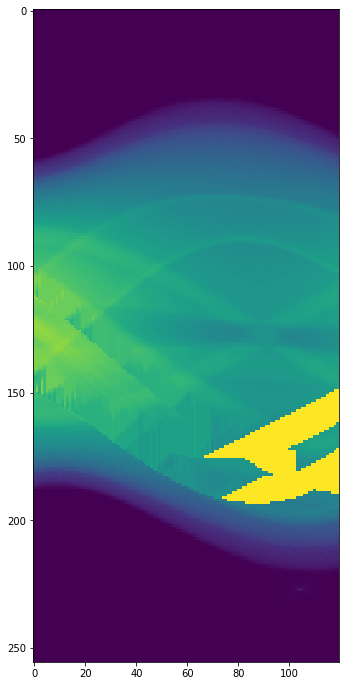

In [37]:
plt.figure(figsize=(8,12))
plt.imshow(result_img[:,0:120])
plt.colorbar

In [38]:
# plt.imshow(result_img)
# plt.colorbar
# plt.axis('off'), plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
# plt.savefig('images/RCNN3(100)_test.png', bbox_inches = 'tight', pad_inches=0, dpi=100)

In [39]:
# np.savetxt('images/CNN_Metal3_3by3_txt.txt', result_img)